In [1]:
import os
import sys
import math
import logging
from pathlib import Path

import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

## A Biophysically Plausible Network

Computational neuroscience exists not only to help us reproduce data, but also to calculate the implications of assumptions. In this example, we will be computing a biophysically plausible IO network and testing three possible configurations of connectivity.

We will estimate the time required to compute networks with gap junctions and discuss why they are such a computational pain. 

We will use gpu resources to accelerate our networks, and note that our simulations would be prohibitive in their absence.

In [2]:
from brian2 import *
from workshop_comp_speeds.Functions import neurons, syn, plot_neurons, plot_coupling_connectivity, visualize
start_scope()

dt = 0.025*ms
dt_rec = 0.25*ms

N_Cells_IO = 3

IO_response = 'both'

exp_run = 1000*ms

# Computational cost varies with type of synapse

It may not be immediately obvious that the type of connections between two neurons changes the required computational time. Create the neuron (look into the functions to get a closer look). We are creating two types of neurons ones that will be used for a coupled a network and one for an uncoupled network. 

In [3]:
IO_Coupled, IO_Statemon_Coupled, IO_Uncoupled, IO_Statemon_Uncoupled = neurons(N_Cells_IO,IO_response,dt,dt_rec)

Create the synapses and define the coupling for each type of neurons

In [4]:
g_c_coupled = 0.00125*mS/cm**2
g_c_uncoupled = 0.00*mS/cm**2

IO_synapse_Coupled, IO_synapse_Uncoupled = syn(g_c_coupled,g_c_uncoupled,IO_Coupled, IO_Uncoupled)

store('IO_group')

Restore the neuron groups and connect the synapses

In [5]:
restore('IO_group') 

IO_synapse_Coupled.connect()
IO_synapse_Uncoupled.connect()

run(exp_run)
# run(exp_run, profile=True, report='text')
# profiling_summary()

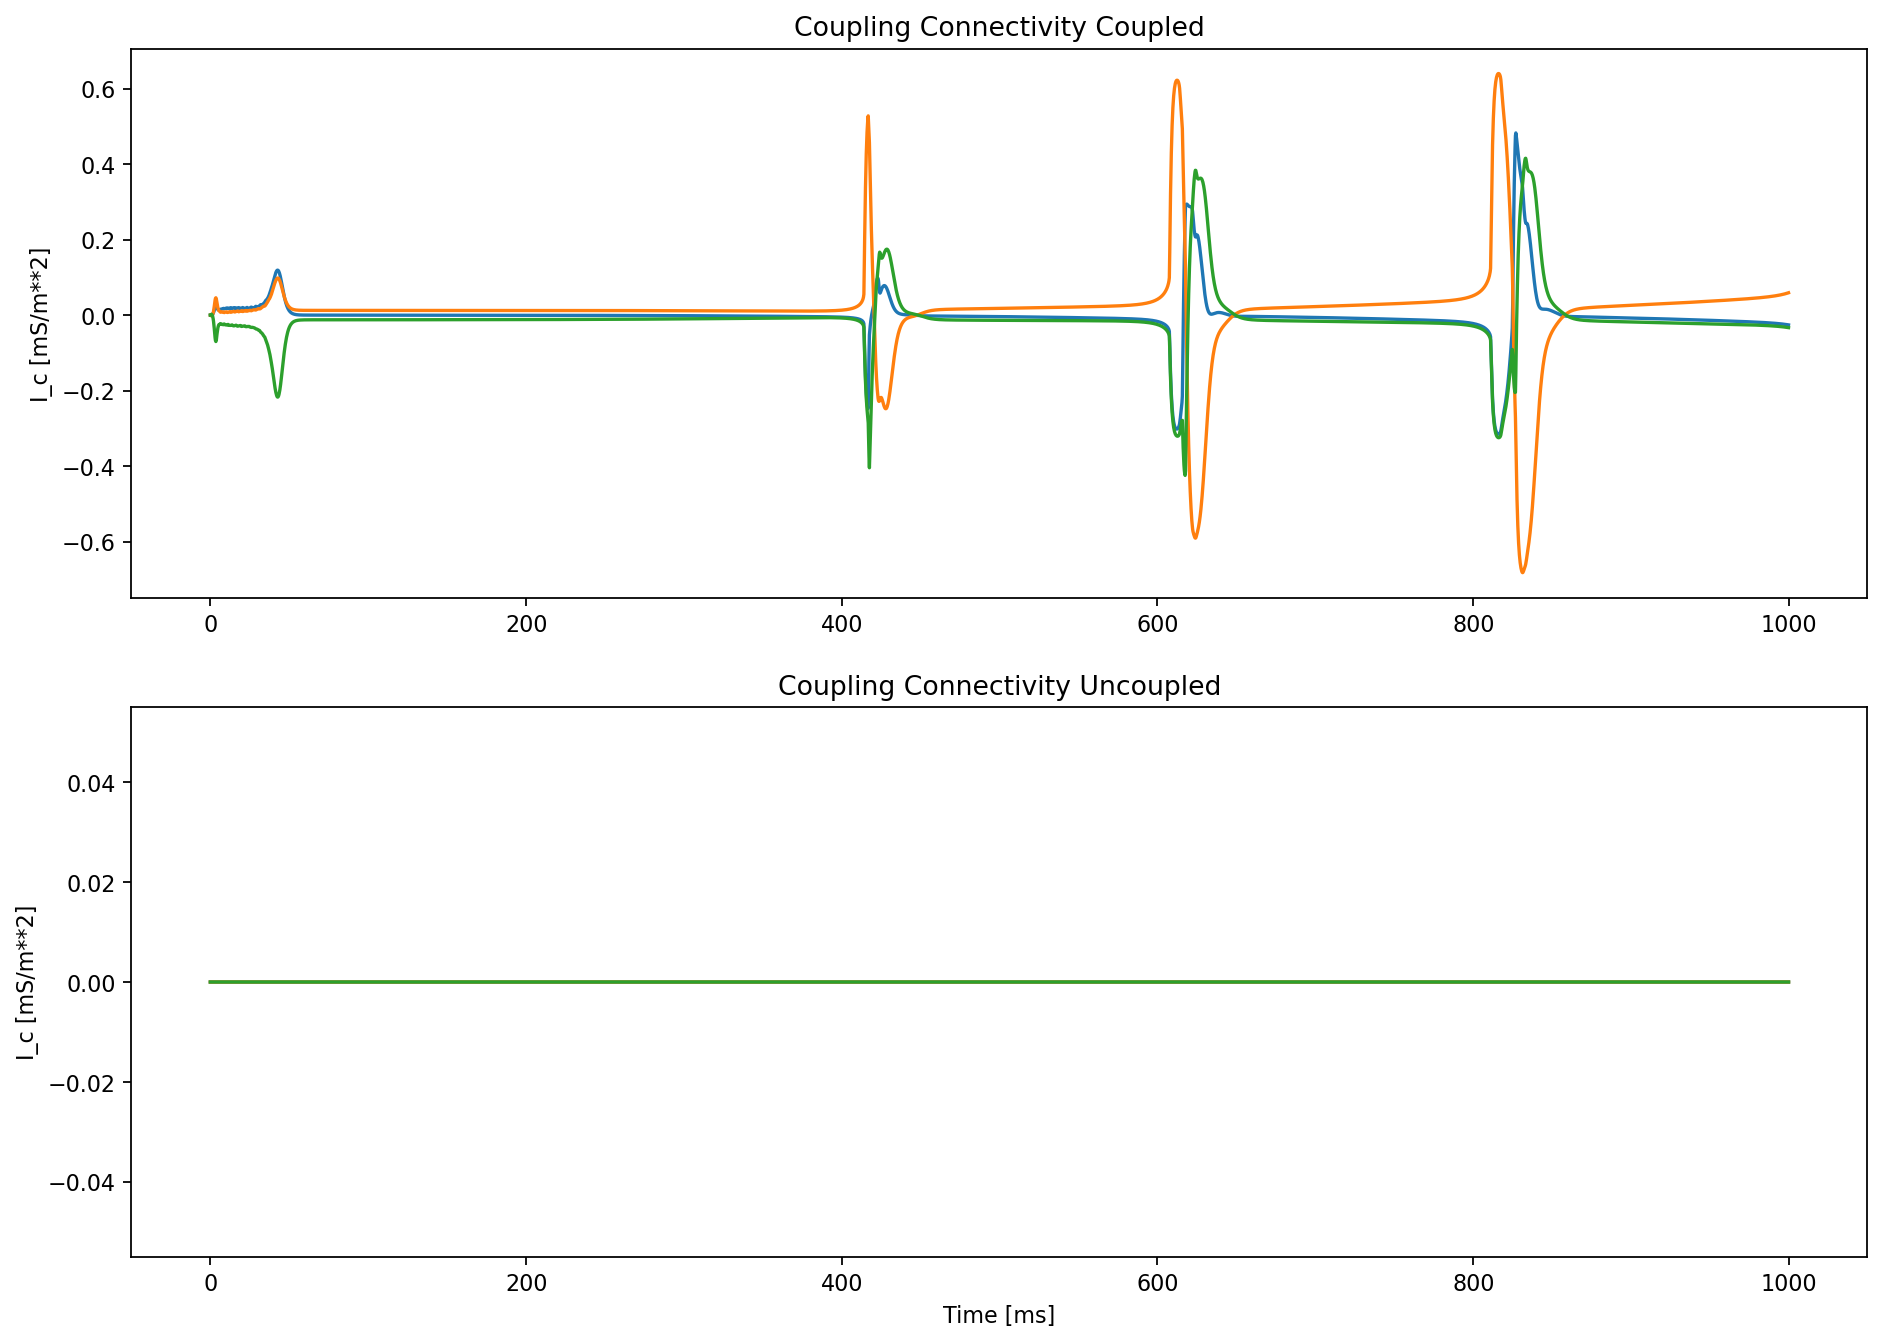

In [6]:
plot_coupling_connectivity(N_Cells_IO,IO_Statemon_Coupled,IO_Statemon_Uncoupled)

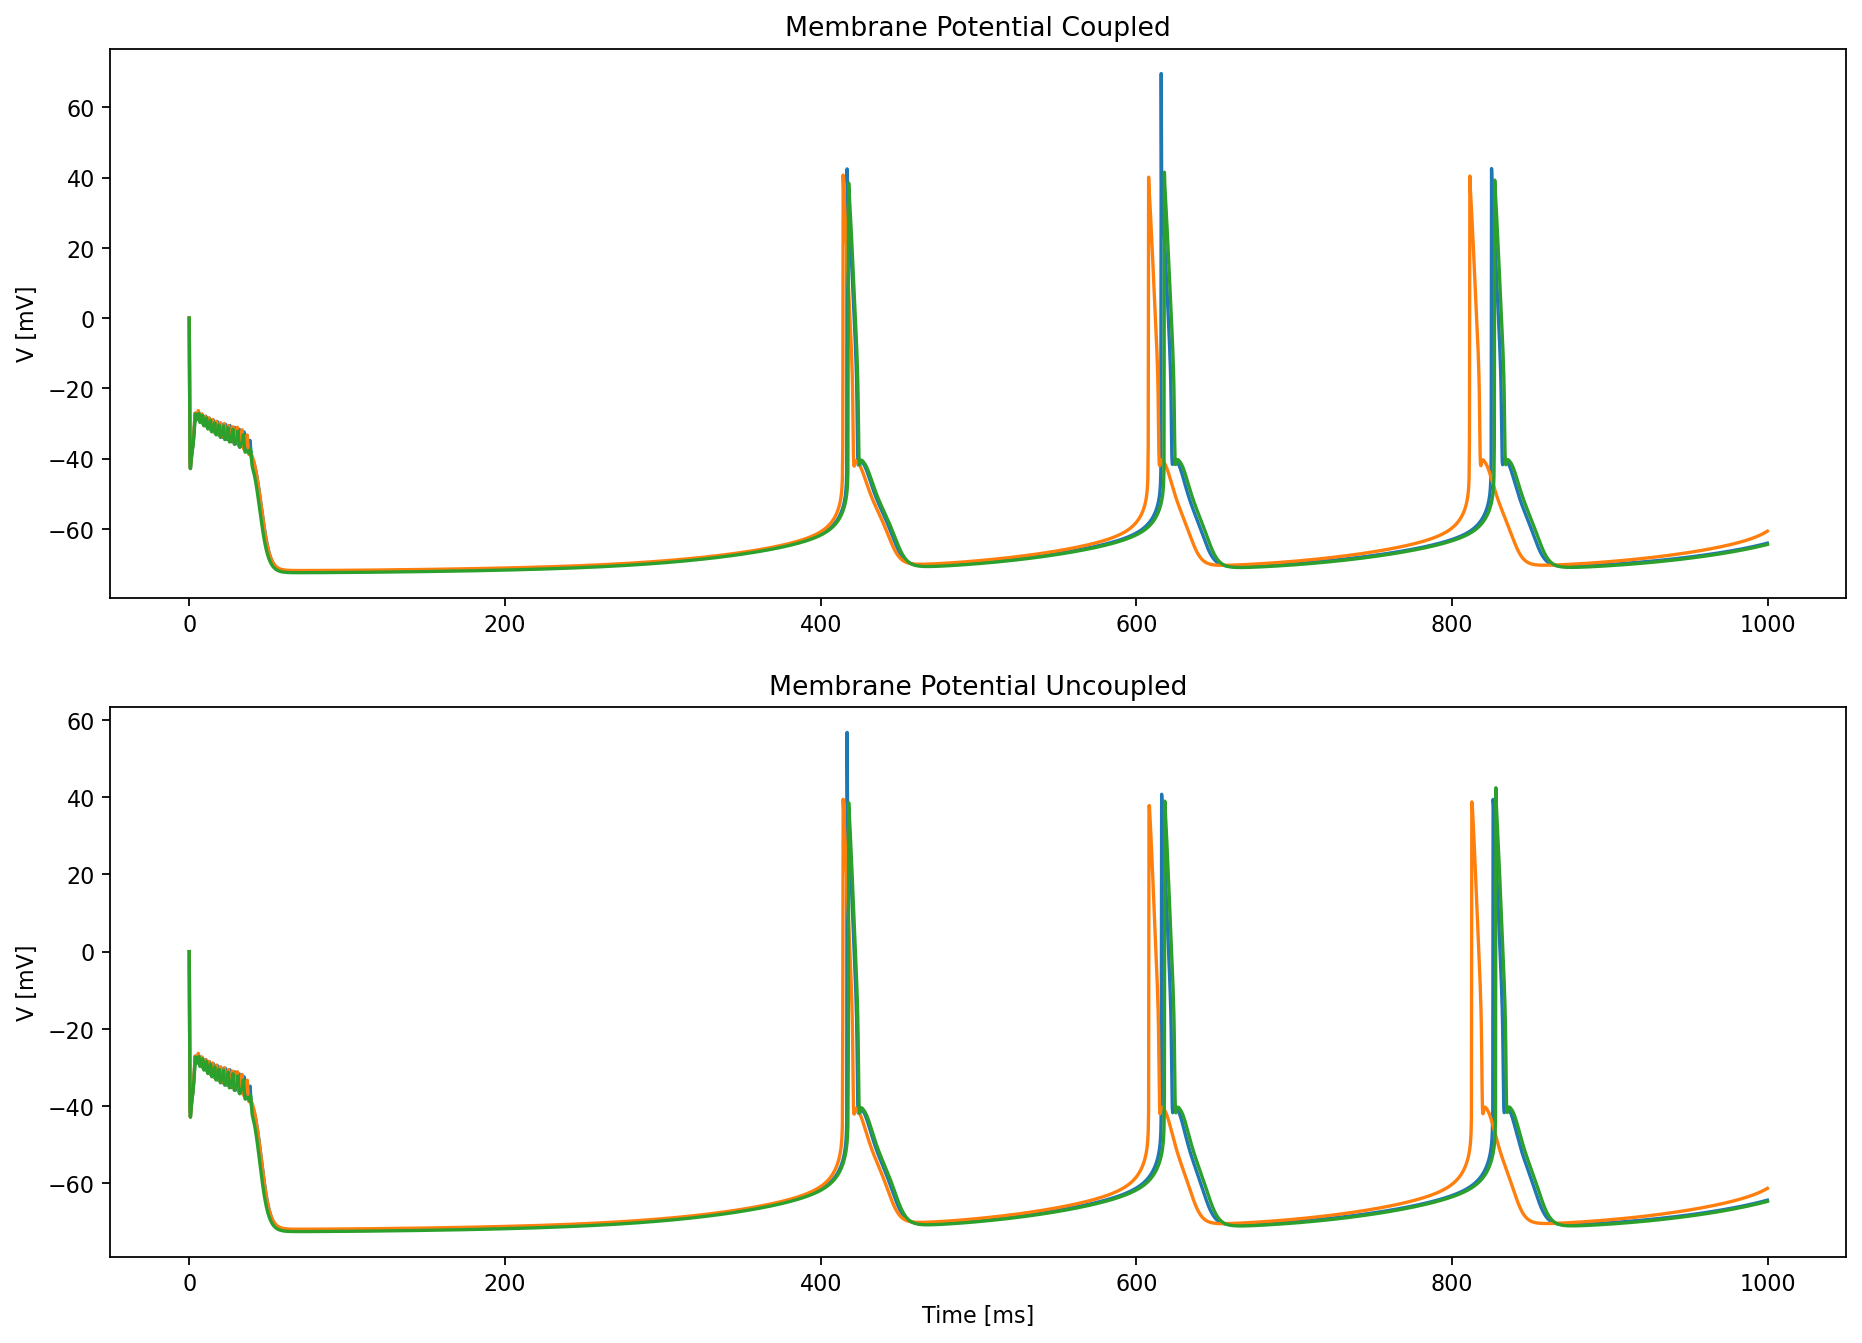

In [7]:
plot_neurons(N_Cells_IO,IO_Statemon_Coupled,IO_Statemon_Uncoupled)

## Scaling of Costs with Simulation Duration

In [8]:
restore('IO_group') 

exp_run = 2000*ms

IO_synapse_Coupled.connect()
IO_synapse_Uncoupled.connect()

run(exp_run, profile=True, report='text')
profiling_summary()

Starting simulation at t=0. s for a duration of 2. s
1.64475 s (82%) simulated in 10s, estimated 2s remaining.
2. s (100%) simulated in 12s


SchweighoferOlive_stateupdater,3.01 s,34.03 %
SchweighoferOlive_Coupled_stateupdater,2.76 s,31.18 %
IO_Synapse_Coupled_summed_variable_I_c_pre,0.79 s,8.91 %
IO_Synapse_Uncoupled_summed_variable_I_c_pre,0.67 s,7.57 %
SchweighoferOlive_Coupled_thresholder,0.46 s,5.19 %
SchweighoferOlive_thresholder,0.35 s,3.93 %
statemonitor,0.34 s,3.89 %
statemonitor_1,0.27 s,3.09 %
SchweighoferOlive,0.10 s,1.07 %
SchweighoferOlive_Coupled,0.06 s,0.64 %
IO_Synapse_Coupled,0.03 s,0.33 %


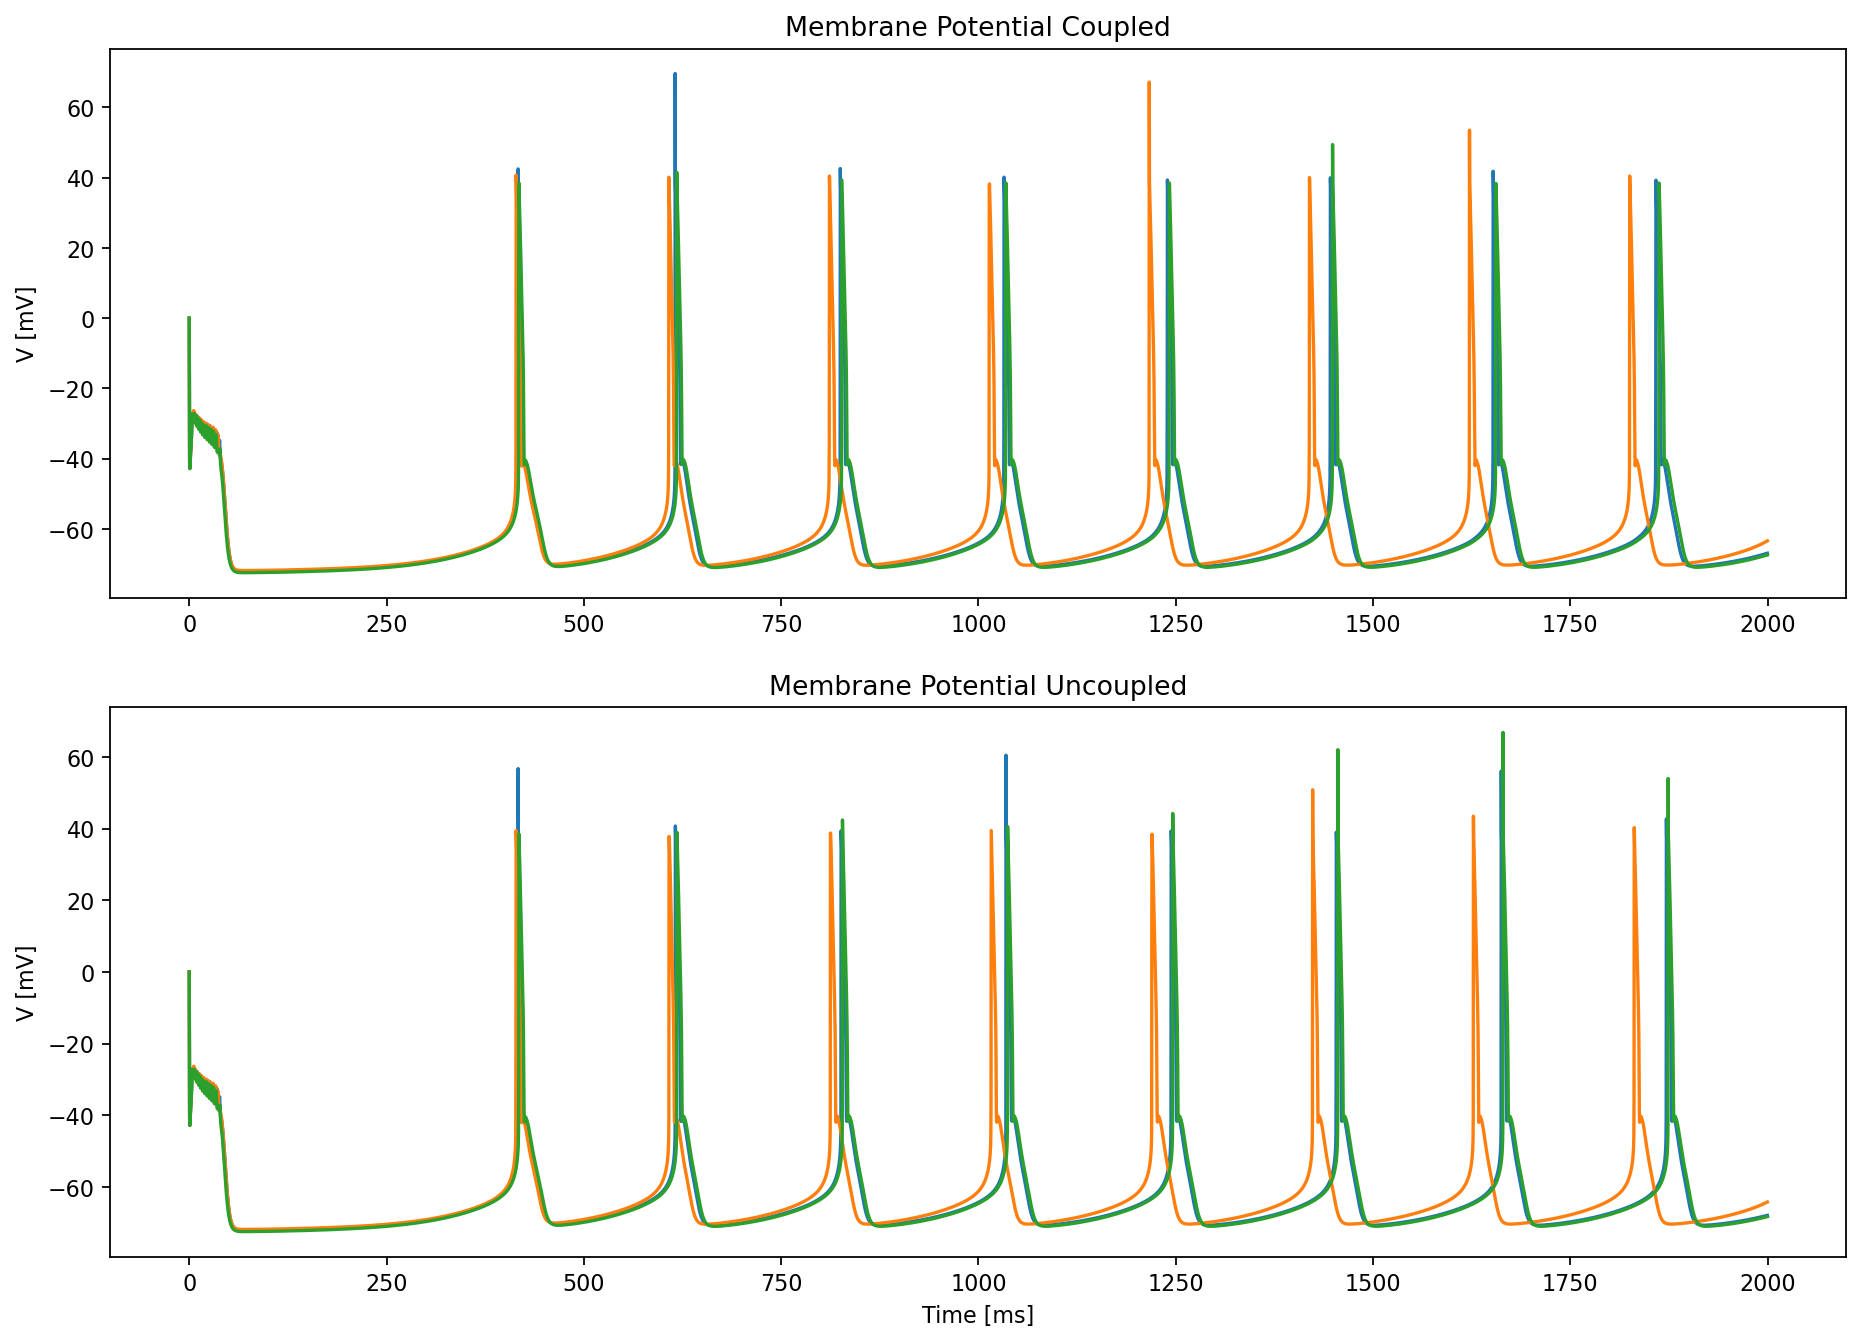

In [9]:
plot_neurons(N_Cells_IO,IO_Statemon_Coupled,IO_Statemon_Uncoupled)

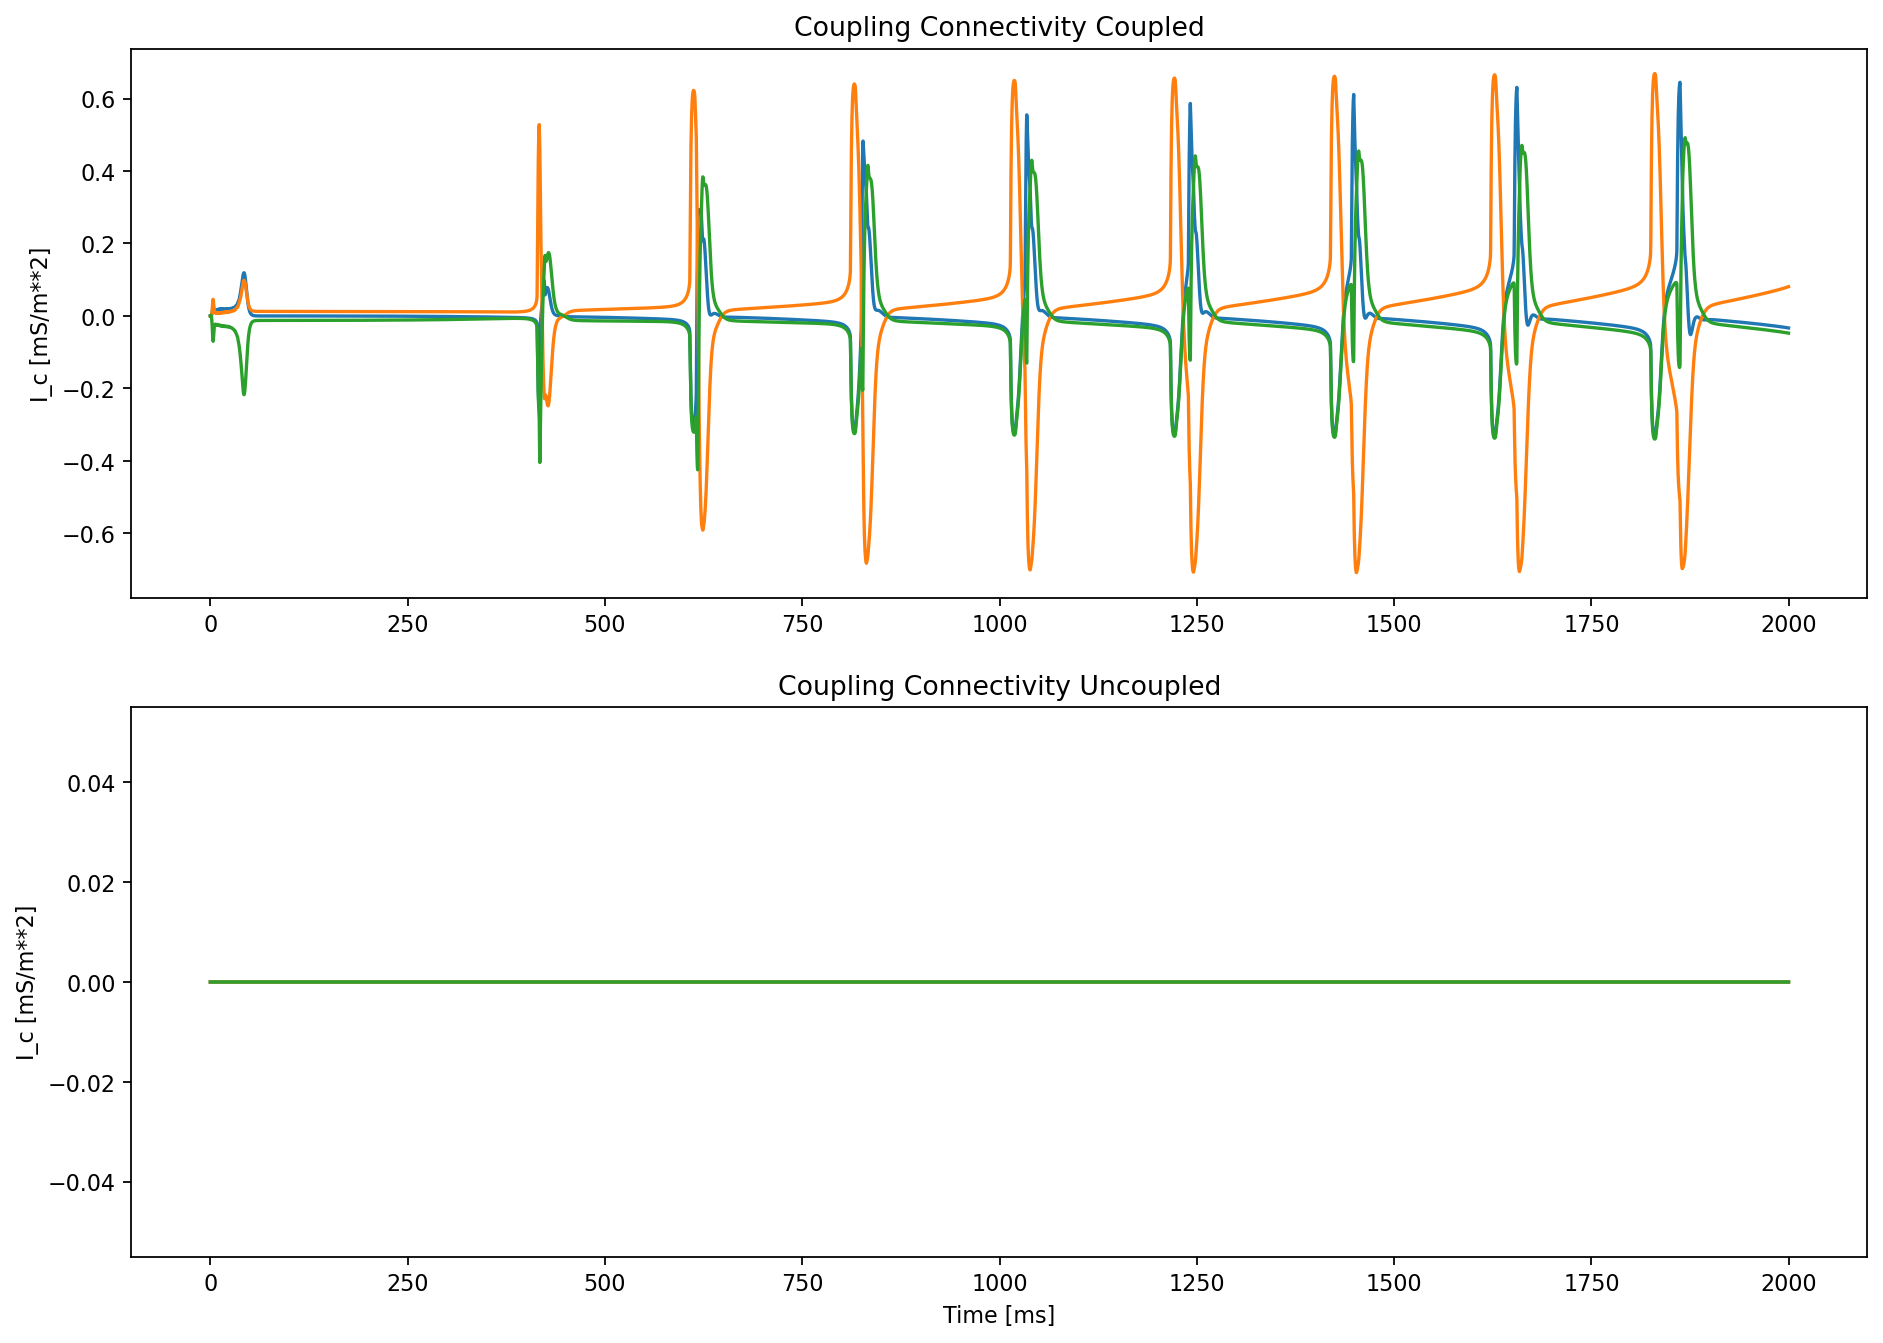

In [10]:
plot_coupling_connectivity(N_Cells_IO,IO_Statemon_Coupled,IO_Statemon_Uncoupled)

## How execution varies with network size

In [11]:
start_scope()

dt = 0.025*ms
dt_rec = 0.25*ms

N_Cells_IO_Multiple_Cells = 5 ### CHange number of cells

IO_response = 'both'

exp_run = 1000*ms


IO_Coupled_Multiple_Cells, IO_Statemon_Coupled_Multiple_Cells, IO_Uncoupled_Multiple_Cells, IO_Statemon_Uncoupled_Multiple_Cells = neurons(N_Cells_IO_Multiple_Cells,IO_response,dt,dt_rec)

g_c_coupled = 0.00125*mS/cm**2
g_c_uncoupled = 0.00*mS/cm**2

IO_synapse_Coupled_Multiple_Cells, IO_synapse_Uncoupled_Multiple_Cells = syn(g_c_coupled, g_c_uncoupled, IO_Coupled_Multiple_Cells, IO_Uncoupled_Multiple_Cells)
store('IO_group_Multiple_Cells')

In [13]:
restore('IO_group_Multiple_Cells') 

exp_run = 500*ms

IO_synapse_Coupled_Multiple_Cells.connect()
IO_synapse_Uncoupled_Multiple_Cells.connect()

run(exp_run, profile=True, report='text')
profiling_summary()

Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s


SchweighoferOlive_Coupled_stateupdater_1,0.78 s,32.82 %
SchweighoferOlive_stateupdater_1,0.72 s,30.06 %
IO_Synapse_Coupled_summed_variable_I_c_pre,0.24 s,10.10 %
IO_Synapse_Uncoupled_summed_variable_I_c_pre,0.21 s,8.93 %
SchweighoferOlive_Coupled_thresholder_1,0.12 s,5.03 %
SchweighoferOlive_thresholder_1,0.09 s,3.93 %
statemonitor_2,0.09 s,3.60 %
statemonitor_3,0.08 s,3.27 %
SchweighoferOlive,0.03 s,1.05 %
SchweighoferOlive_Coupled,0.02 s,0.76 %
IO_Synapse_Coupled,0.01 s,0.38 %


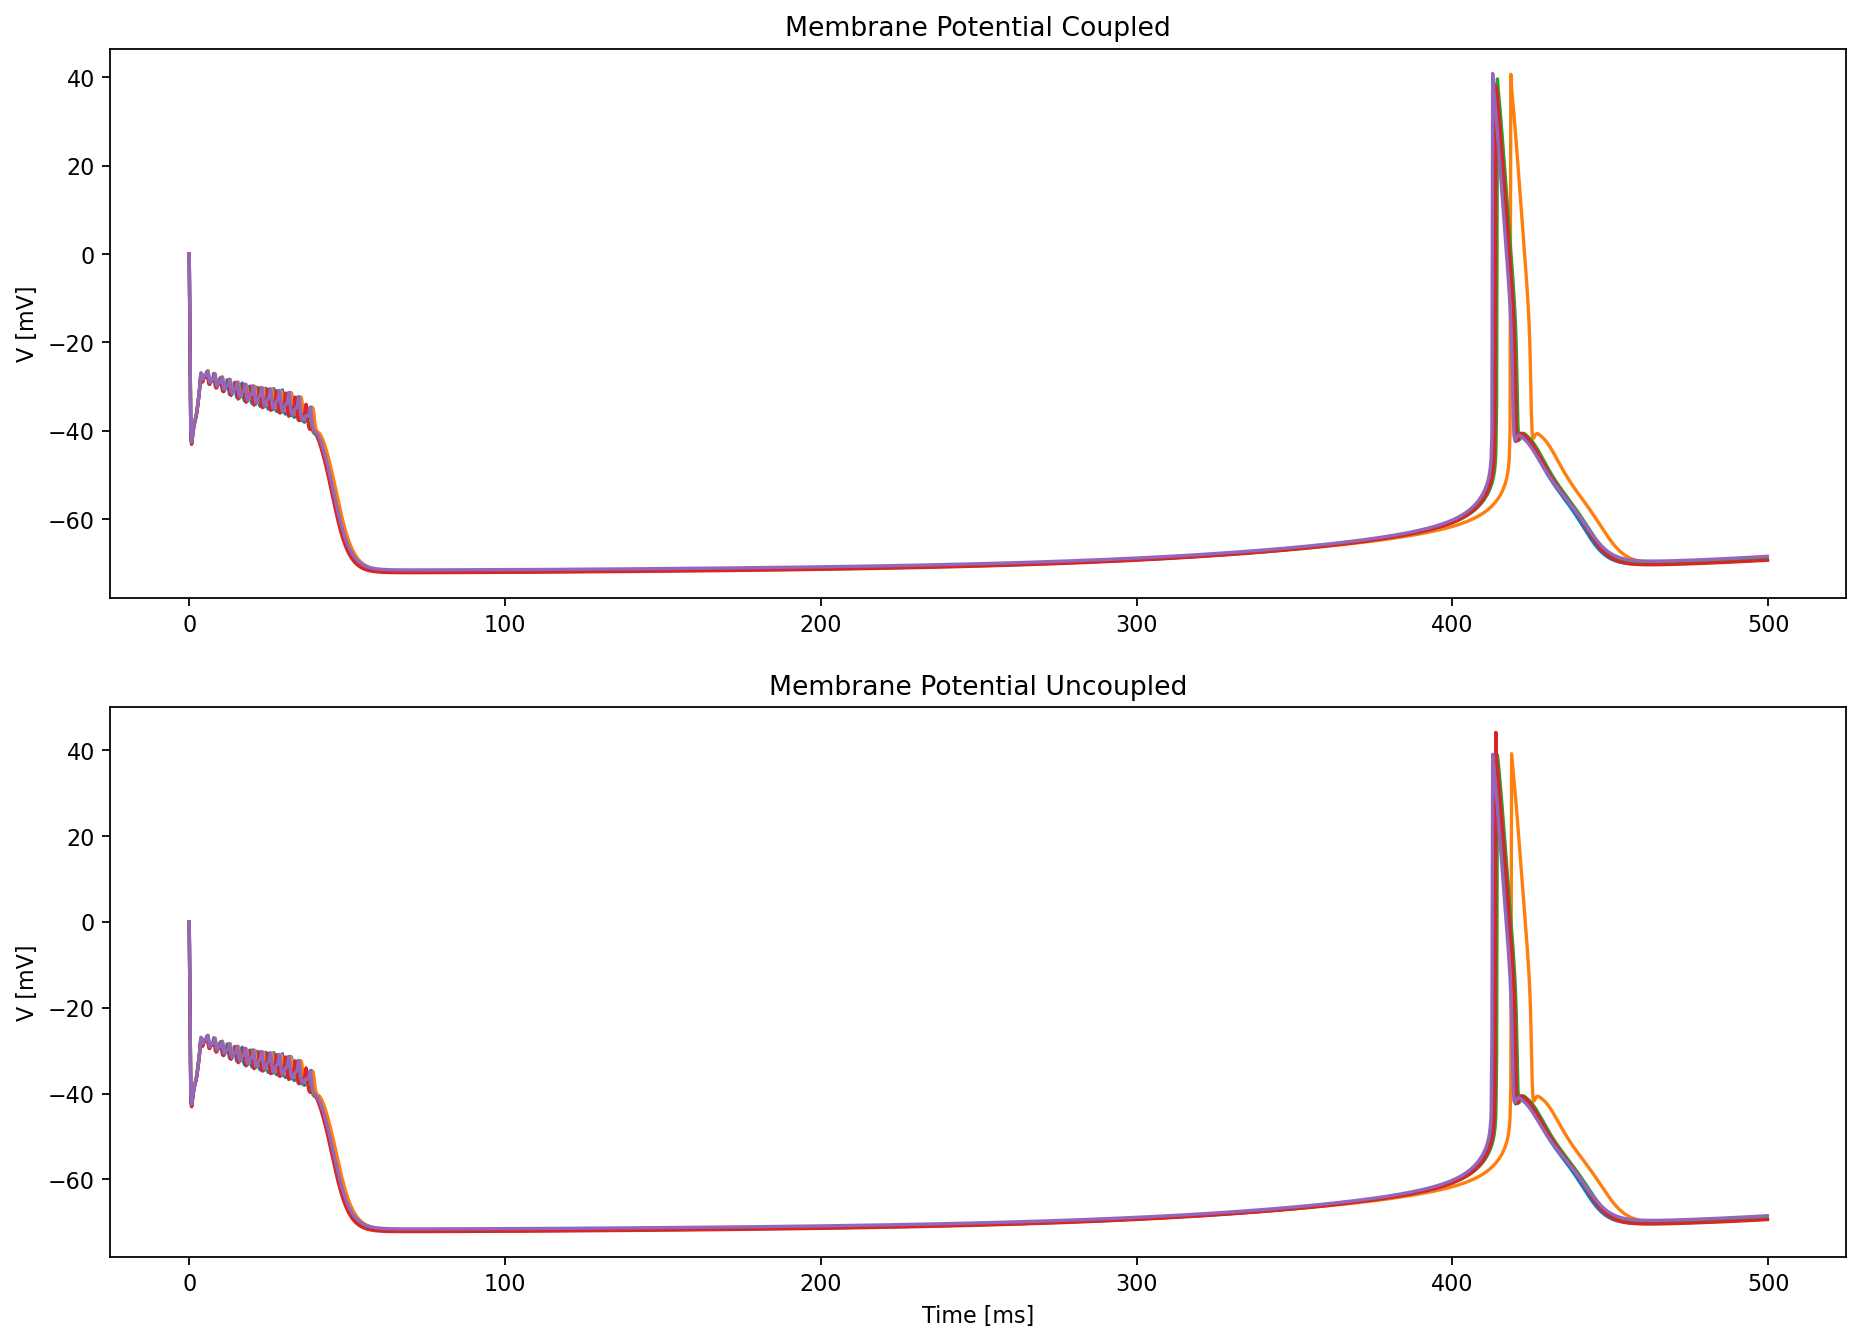

In [14]:
plot_neurons(N_Cells_IO_Multiple_Cells,IO_Statemon_Coupled_Multiple_Cells,IO_Statemon_Uncoupled_Multiple_Cells)

# Connectivity Matters to Computation

Here we compare the computational costs of different connection probabilities. Three types of connectivities are used: disconnected, homogeneous and clustered.

## Condition 1: Disconnected connectivity

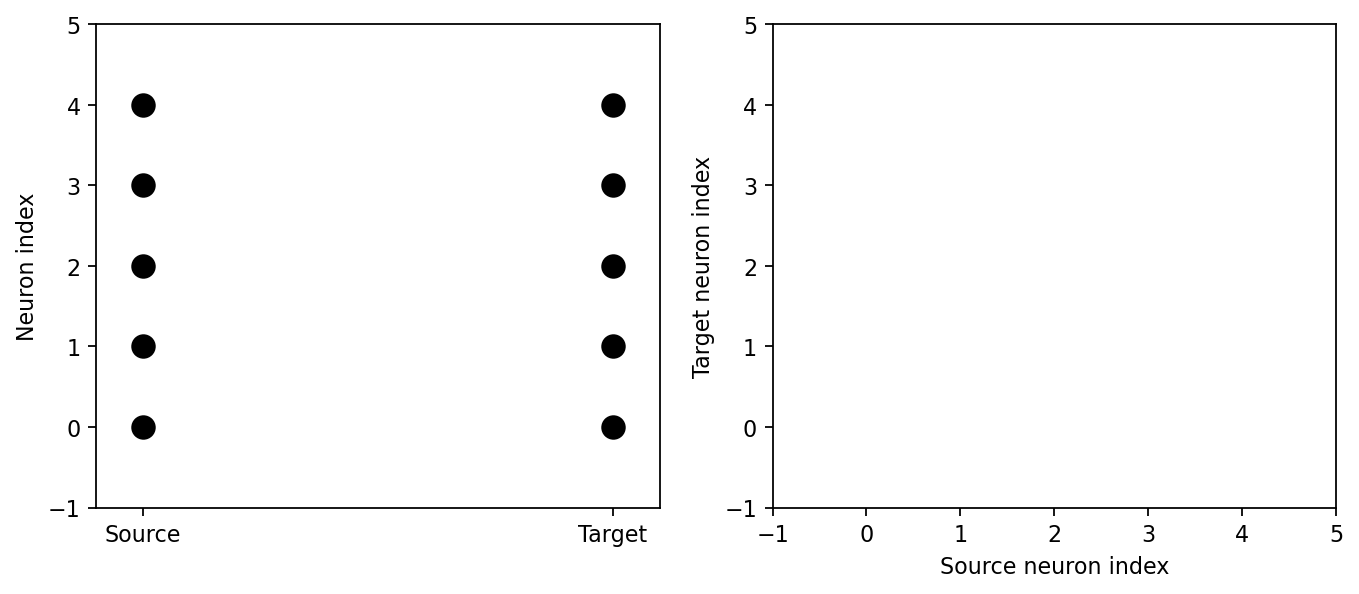

In [18]:
restore('IO_group_Multiple_Cells') 

visualise(IO_synapse_Coupled_Multiple_Cells)

run(exp_run, profile=True)

In [19]:
profiling_summary() 

SchweighoferOlive_Coupled_stateupdater_1,0.75 s,34.70 %
SchweighoferOlive_stateupdater_1,0.69 s,32.17 %
IO_Synapse_Coupled_summed_variable_I_c_pre,0.18 s,8.20 %
IO_Synapse_Uncoupled_summed_variable_I_c_pre,0.14 s,6.42 %
SchweighoferOlive_Coupled_thresholder_1,0.10 s,4.77 %
SchweighoferOlive_thresholder_1,0.09 s,4.31 %
statemonitor_2,0.09 s,4.22 %
statemonitor_3,0.07 s,3.15 %
SchweighoferOlive,0.02 s,0.97 %
SchweighoferOlive_Coupled,0.01 s,0.46 %
IO_Synapse_Coupled,0.01 s,0.42 %


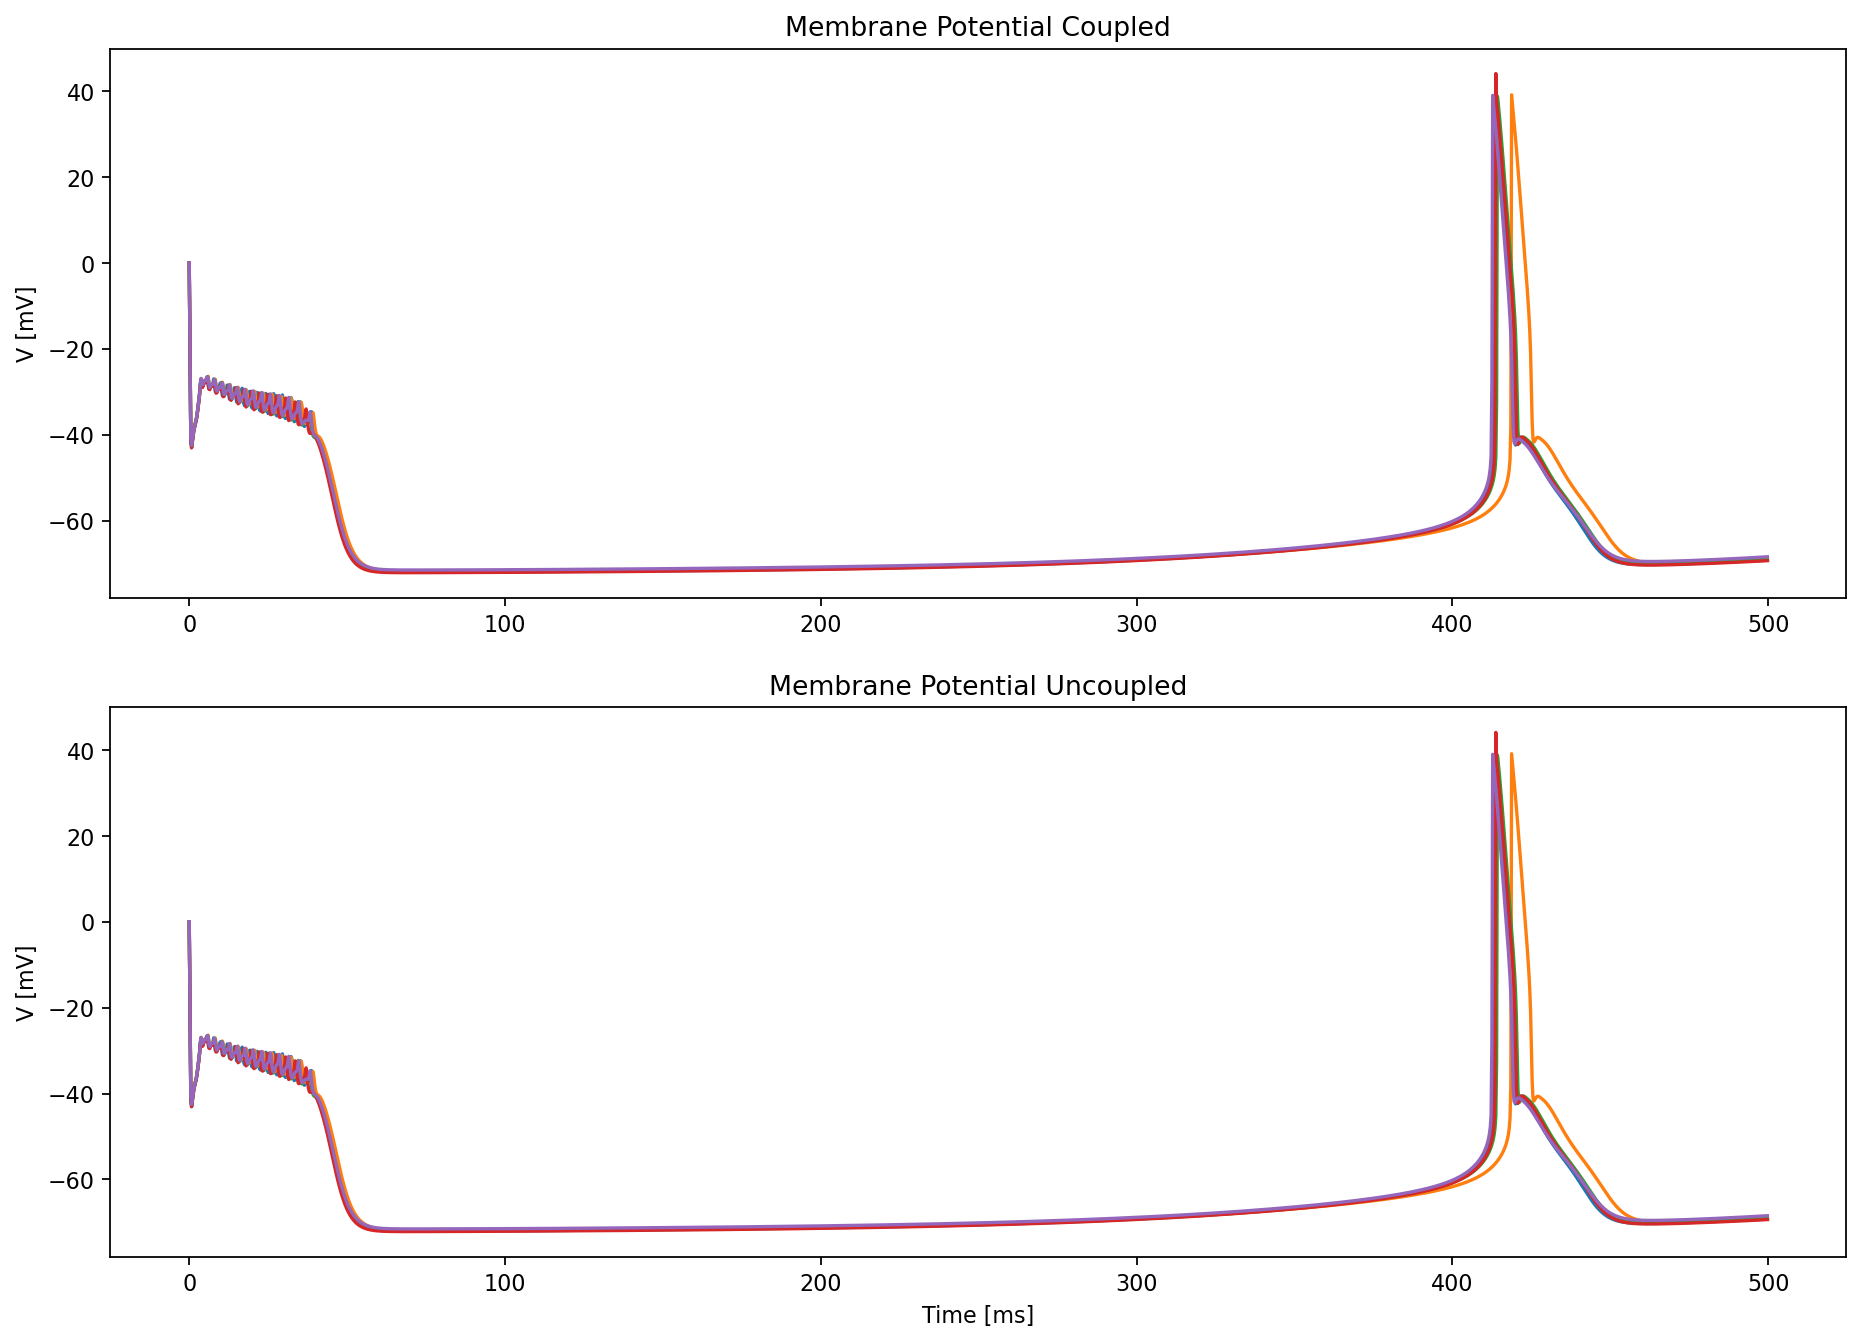

In [20]:
plot_neurons(N_Cells_IO_Multiple_Cells,IO_Statemon_Coupled_Multiple_Cells,IO_Statemon_Uncoupled_Multiple_Cells)

## Condition 2: Homogeneous connectivity

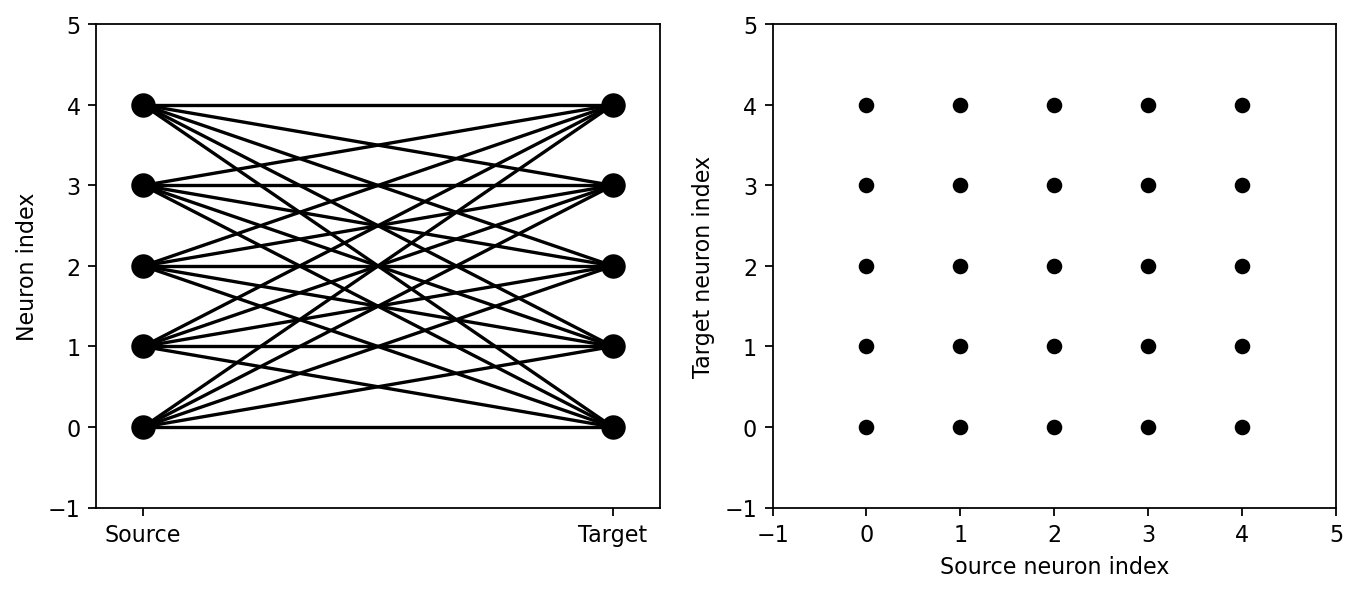

In [21]:
restore('IO_group_Multiple_Cells') 
IO_synapse_Coupled_Multiple_Cells.connect()
IO_synapse_Uncoupled_Multiple_Cells.connect()

visualise(IO_synapse_Coupled_Multiple_Cells)

run(exp_run, profile=True)

In [22]:
profiling_summary() 

SchweighoferOlive_Coupled_stateupdater_1,0.74 s,31.44 %
SchweighoferOlive_stateupdater_1,0.73 s,30.82 %
IO_Synapse_Coupled_summed_variable_I_c_pre,0.24 s,10.27 %
IO_Synapse_Uncoupled_summed_variable_I_c_pre,0.22 s,9.13 %
statemonitor_2,0.10 s,4.36 %
SchweighoferOlive_thresholder_1,0.10 s,4.31 %
SchweighoferOlive_Coupled_thresholder_1,0.09 s,3.98 %
statemonitor_3,0.07 s,2.93 %
SchweighoferOlive,0.03 s,1.35 %
SchweighoferOlive_Coupled,0.02 s,0.97 %
IO_Synapse_Uncoupled,0.00 s,0.21 %


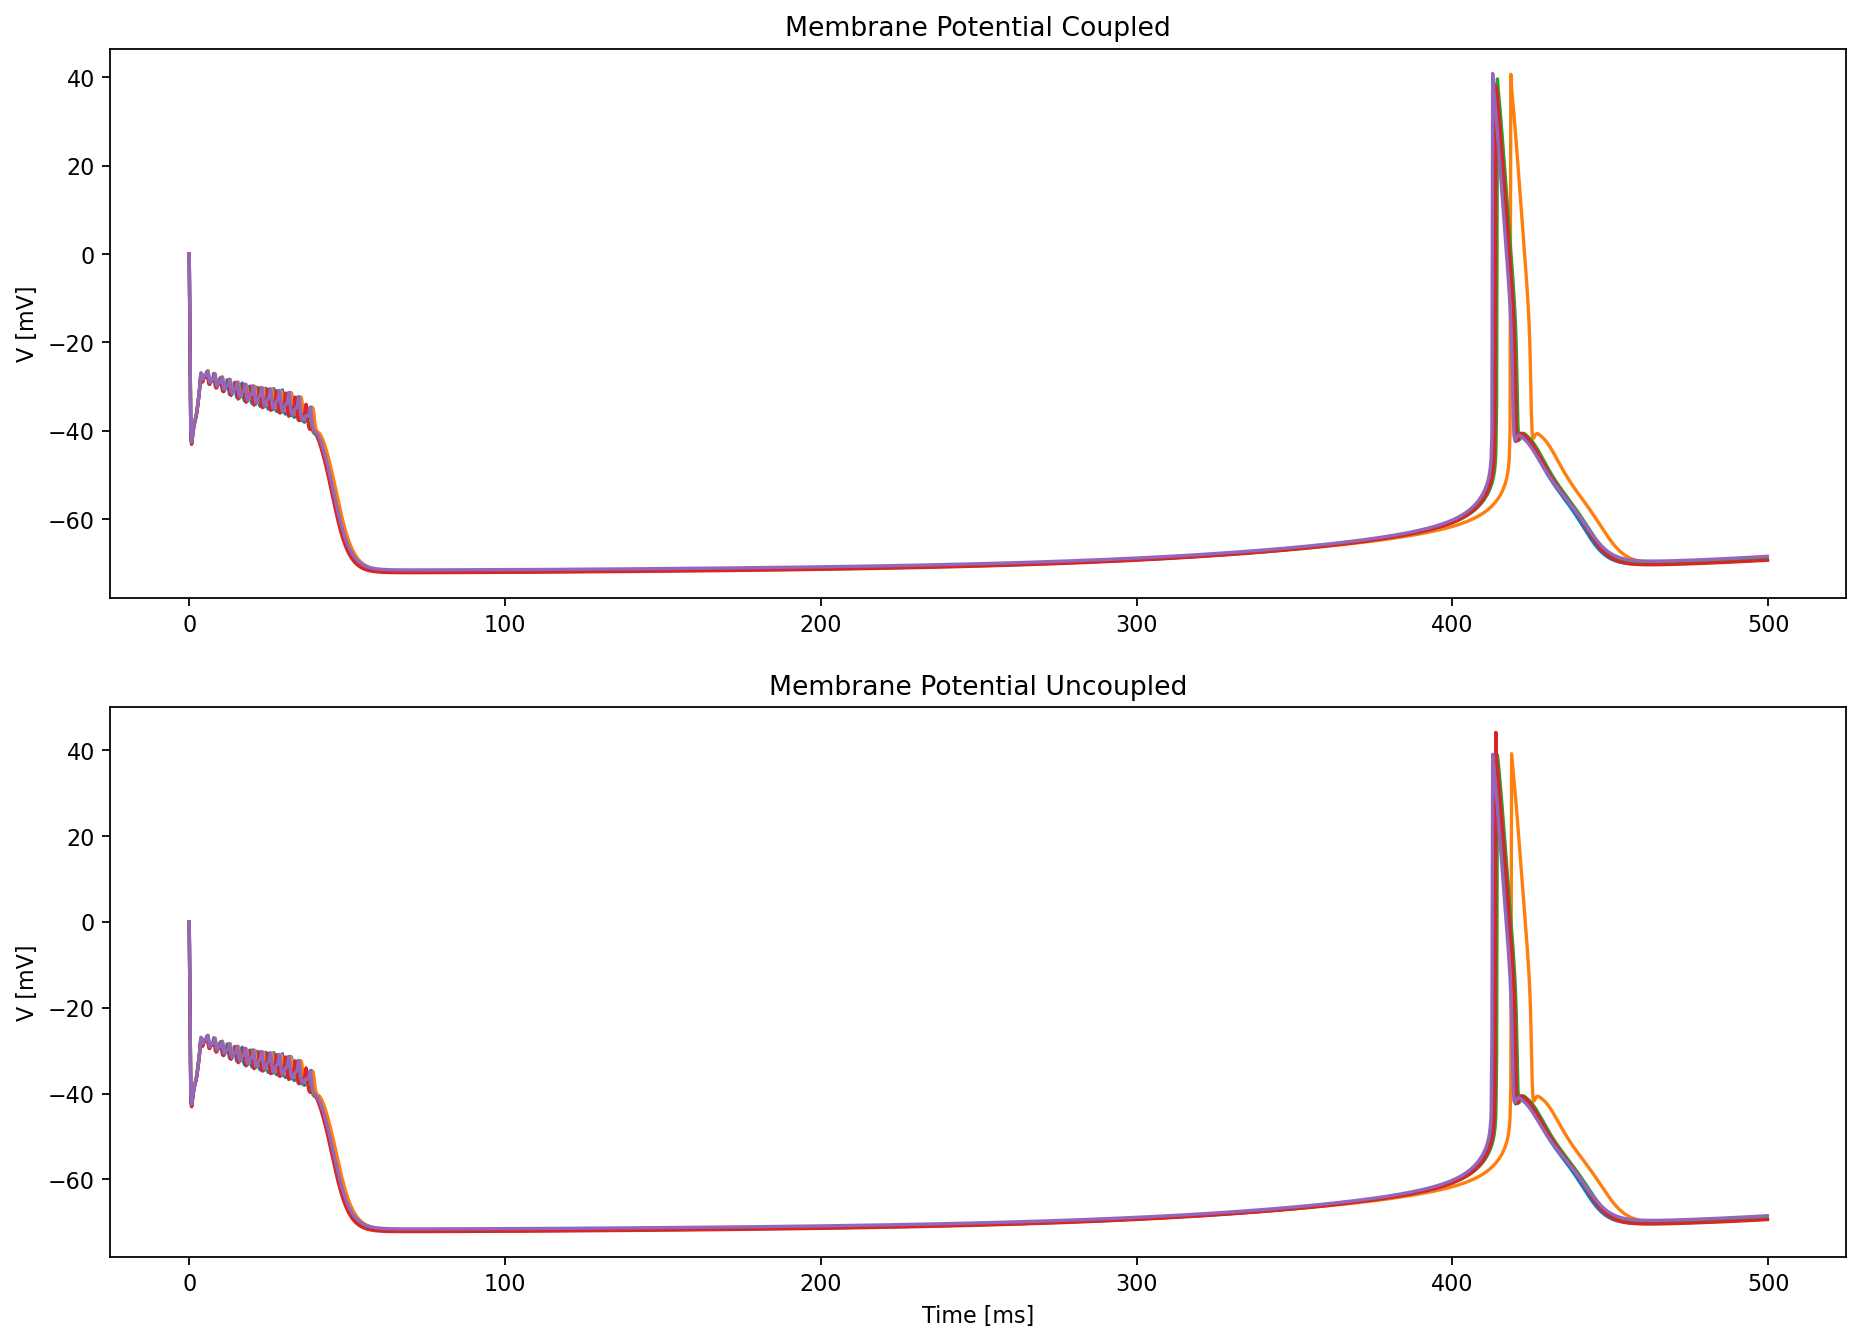

In [23]:
plot_neurons(N_Cells_IO_Multiple_Cells,IO_Statemon_Coupled_Multiple_Cells,IO_Statemon_Uncoupled_Multiple_Cells)

## Condition 3: Clustered connectivity

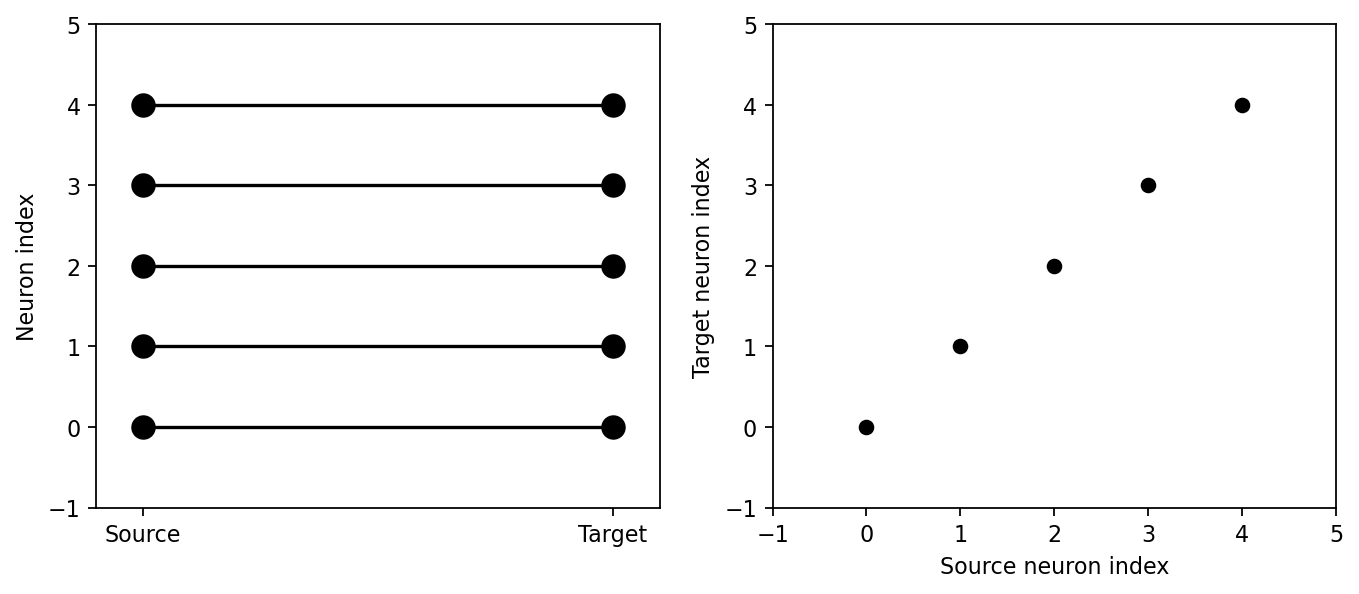

In [24]:
cluster = 'i==j'

restore('IO_group_Multiple_Cells') 
IO_synapse_Coupled_Multiple_Cells.connect(condition=cluster)
IO_synapse_Uncoupled_Multiple_Cells.connect(condition=cluster)

visualise(IO_synapse_Coupled_Multiple_Cells)

run(exp_run, profile=True)

In [25]:
profiling_summary() 

SchweighoferOlive_stateupdater_1,0.83 s,34.23 %
SchweighoferOlive_Coupled_stateupdater_1,0.79 s,32.86 %
IO_Synapse_Coupled_summed_variable_I_c_pre,0.19 s,7.66 %
IO_Synapse_Uncoupled_summed_variable_I_c_pre,0.18 s,7.50 %
statemonitor_2,0.10 s,4.24 %
SchweighoferOlive_Coupled_thresholder_1,0.10 s,4.21 %
SchweighoferOlive_thresholder_1,0.09 s,3.54 %
statemonitor_3,0.08 s,3.38 %
SchweighoferOlive,0.04 s,1.48 %
SchweighoferOlive_Coupled,0.01 s,0.54 %
IO_Synapse_Coupled,0.01 s,0.25 %


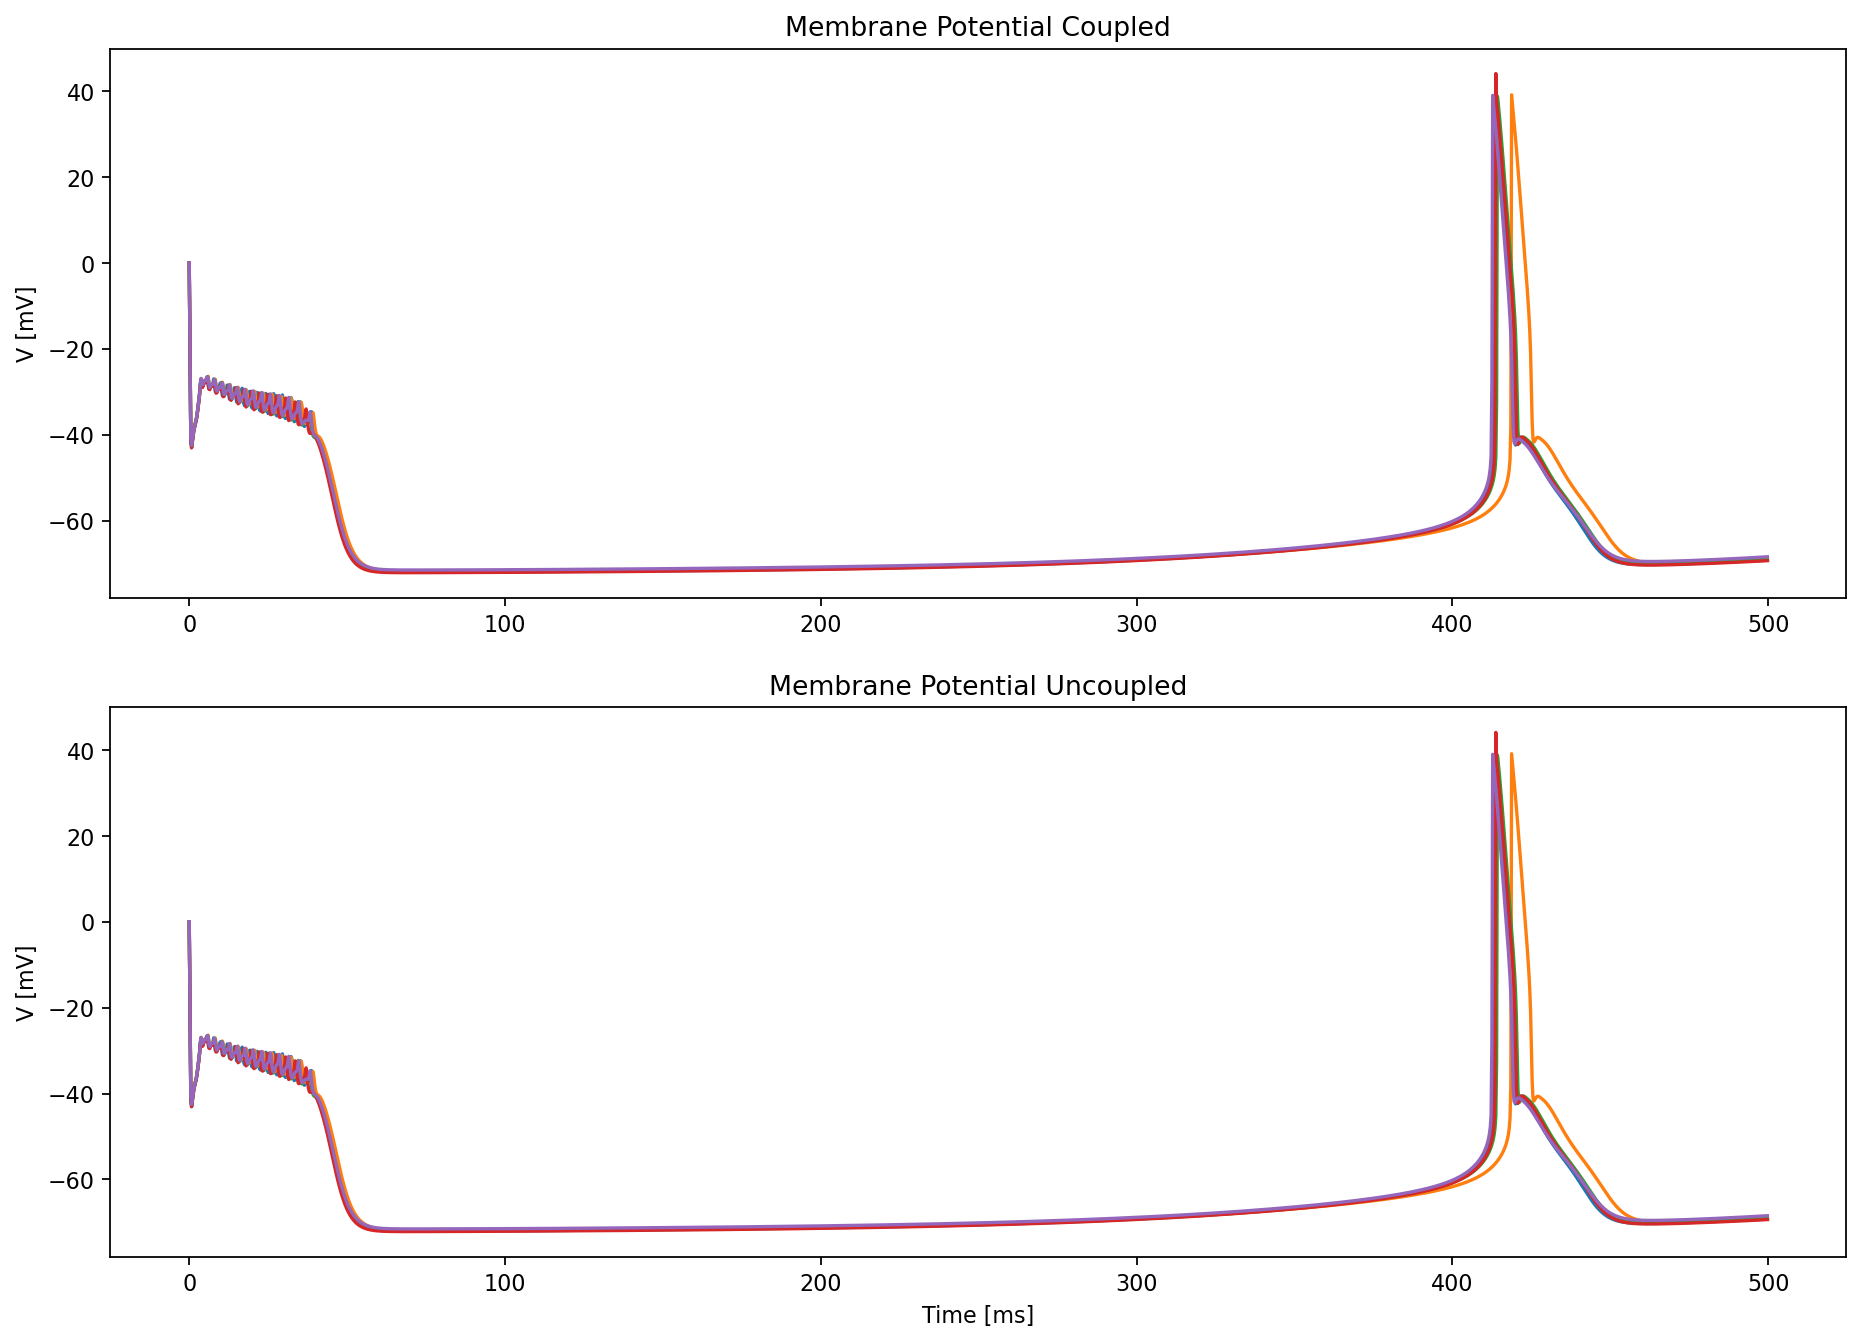

In [26]:
plot_neurons(N_Cells_IO_Multiple_Cells,IO_Statemon_Coupled_Multiple_Cells,IO_Statemon_Uncoupled_Multiple_Cells)